In [7]:


import os, sys, time, copy, pickle as pkl
import numpy as np
import pandas as pd
import torch

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
output_dir = '/checkpoint/pillutla/pfl/outputs'

In [15]:
df_lst = []
param_list = ['tiny', 'mini']

fn = 'so_{}_try1_{}.csv'
for p in param_list:
    for t in ['train', 'test']:
        df_lst.append(pd.read_csv(os.path.join(output_dir, fn.format(p, t))))

df_tr = np.asarray(df_lst, dtype=np.object).reshape(-1, 2)[:, 0]
df_te = np.asarray(df_lst, dtype=np.object).reshape(-1, 2)[:, 1]

# df_tr.append(pd.read_csv(os.path.join(output_dir, fn1.format('train'))))
# df_te.append(pd.read_csv(os.path.join(output_dir, fn1.format('test'))))
# df_tr.append(pd.read_csv(os.path.join(output_dir, fn2.format('train'))))
# df_te.append(pd.read_csv(os.path.join(output_dir, fn2.format('test'))))

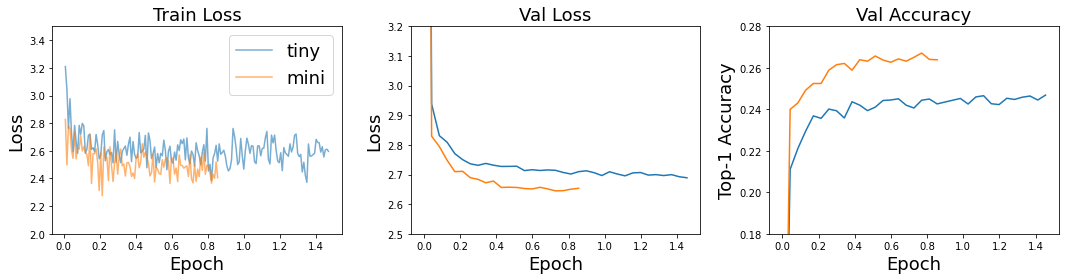

In [16]:
f, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, (do, df) in enumerate(zip(param_list, df_tr)):
    ax[0].plot(df['epoch'], df['avg_loss'], alpha=0.6, color=COLORS[i], label=do)

for param, df in zip(param_list, df_te):
    ax[1].plot(df['epoch'], df['loss|mean'], label=param)
    ax[2].plot(df['epoch'], df['accuracy_top1|mean'], label=param)

ax[0].set_title('Train Loss', fontsize=18)
ax[1].set_title('Val Loss', fontsize=18)
ax[2].set_title("Val Accuracy", fontsize=18)
for a in ax:
    a.set_xlabel('Epoch', fontsize=18)
    a.set_ylabel('Loss', fontsize=18)   
ax[2].set_ylabel("Top-1 Accuracy", fontsize=18)

ax[0].legend(fontsize=18)
ax[0].set_ylim((2, 3.5))
ax[1].set_ylim((2.5, 3.2))
ax[2].set_ylim((0.18, 0.28))

plt.tight_layout()